In [1]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
ratings = pd.read_csv('data/ratings.csv', encoding='utf-8')
tags = pd.read_csv('data/tags.csv', encoding='utf-8')
movies = pd.read_csv('data/movies.csv', encoding='utf-8')

In [3]:
ratings.shape

(100836, 4)

In [4]:
movies.shape

(9742, 3)

In [5]:
movies.set_index('movieId', inplace = True)

In [6]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


## 데이터 전처리 

### 장르에 해당하는 데이터 전처리

In [7]:
genres_list = [x.split('|') for x in movies['genres'].values]
genres_list

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Drama', 'Romance'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Children', 'Drama'],
 ['Crime', 'Drama'],
 ['Children', 'Comedy'],
 

In [8]:
len(genres_list)

9742

In [9]:
genres_list = list(set(sum(genres_list, [])))
len(genres_list)

20

In [10]:
genres = movies['genres'].str.get_dummies(sep = '|')

In [11]:
genres = genres.assign(title = lambda x: movies['title'].loc[x.index])

In [12]:
genres

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Toy Story (1995)
2,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Jumanji (1995)
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Grumpier Old Men (1995)
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,Waiting to Exhale (1995)
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Father of the Bride Part II (1995)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Black Butler: Book of the Atlantic (2017)
193583,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,No Game No Life: Zero (2017)
193585,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Flint (2017)


In [13]:
no_genres_list = genres.query('`(no genres listed)` == 1').index
genres.drop(no_genres_list, inplace = True)
genres.drop(['(no genres listed)'], axis = 1, inplace = True)

In [14]:
genres.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,title
movieId,,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Toy Story (1995)
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Jumanji (1995)
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Grumpier Old Men (1995)
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,Waiting to Exhale (1995)
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Father of the Bride Part II (1995)


### 영화 연도에 해당하는 데이터 전처리

이건 엑셀에서 파워쿼리가 잘하는 부분이다. <br>
다만 엑셀 내에서도 필터를 눌러서 잘못된 에러가 있는지 확인하는 과정이 필요하다.
![adv_extrac](extract_yr.png)

In [15]:
movies['year'] = movies['title'].str.extract('(\(\d\d\d\d\))')

In [16]:
movies.isna().sum()

title      0
genres     0
year      13
dtype: int64

In [17]:
movies

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
3,Grumpier Old Men (1995),Comedy|Romance,(1995)
4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
5,Father of the Bride Part II (1995),Comedy,(1995)
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,(2017)
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,(2017)
193585,Flint (2017),Drama,(2017)


In [18]:
movies.dtypes

title     object
genres    object
year      object
dtype: object

In [19]:
movies['year']

movieId
1         (1995)
2         (1995)
3         (1995)
4         (1995)
5         (1995)
           ...  
193581    (2017)
193583    (2017)
193585    (2017)
193587    (2018)
193609    (1991)
Name: year, Length: 9742, dtype: object

In [20]:
movies['year'] = movies['year'].apply(lambda x: str(x).replace('(','').replace(')',''))

In [21]:
movies

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
193585,Flint (2017),Drama,2017


In [22]:
movies.dropna(axis = 0, inplace=True)
movies['year'] = movies['year'].apply(lambda x: x.replace('(','').replace(')',''))

# Analysis

## 연도별 영화 

In [23]:
yr_rating = movies.groupby('year')['title'].count()
print(yr_rating.sort_values(ascending = False))
print(yr_rating.describe())

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1917      1
1915      1
1908      1
1903      1
1902      1
Name: title, Length: 107, dtype: int64
count    107.000000
mean      91.046729
std      102.029073
min        1.000000
25%       16.000000
50%       39.000000
75%      150.000000
max      311.000000
Name: title, dtype: float64


In [24]:
movies

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
193585,Flint (2017),Drama,2017


In [25]:
yr1993_list = movies.query('year == "1993"').index
ratings.query('movieId in @yr1993_list')['rating'].mean()

3.4521518310612134

In [26]:
output = []
for year in movies.year.unique():
    yr_list = movies.query('year == @year').index
    avg_ratings = round(ratings.query('movieId in @yr_list')['rating'].mean(), 2)
    output.append((year, avg_ratings))
    
output

[('1995', 3.44),
 ('1994', 3.5),
 ('1996', 3.34),
 ('1976', 3.76),
 ('1992', 3.35),
 ('1967', 3.92),
 ('1993', 3.45),
 ('1964', 3.94),
 ('1977', 3.81),
 ('1965', 3.74),
 ('1982', 3.51),
 ('1990', 3.43),
 ('1991', 3.55),
 ('1989', 3.46),
 ('1937', 3.66),
 ('1940', 3.82),
 ('1969', 3.69),
 ('1981', 3.76),
 ('1973', 3.76),
 ('1970', 3.75),
 ('1955', 3.72),
 ('1959', 3.79),
 ('1968', 3.81),
 ('1988', 3.42),
 ('1997', 3.35),
 ('1972', 3.94),
 ('1943', 3.62),
 ('1952', 3.95),
 ('1951', 3.8),
 ('1957', 4.04),
 ('1961', 3.7),
 ('1958', 3.84),
 ('1954', 4.01),
 ('1934', 4.09),
 ('1944', 4.04),
 ('1960', 3.72),
 ('1963', 3.63),
 ('1942', 3.92),
 ('1941', 3.9),
 ('1953', 3.65),
 ('1939', 3.76),
 ('1950', 3.81),
 ('1946', 3.95),
 ('1945', 3.54),
 ('1938', 3.77),
 ('1947', 3.85),
 ('1935', 3.97),
 ('1936', 3.53),
 ('1956', 3.68),
 ('1949', 3.76),
 ('1932', 3.33),
 ('1975', 3.88),
 ('1974', 3.94),
 ('1971', 3.84),
 ('1979', 3.68),
 ('1987', 3.49),
 ('1986', 3.46),
 ('1980', 3.73),
 ('1978', 3.46),
 

In [27]:
output = pd.DataFrame(output, columns = ['year', 'avg_ratings'])
output

,year,avg_ratings
0,1995,3.44
1,1994,3.50
2,1996,3.34
3,1976,3.76
4,1992,3.35
...,...,...
102,2015,3.41
103,2016,3.39
104,2017,3.58
105,2018,3.48


In [28]:
output.dropna(axis = 0, inplace=True)

In [29]:
output = output.query('year != "nan"')

In [34]:
output[['year']] = output[['year']].apply(pd.to_numeric)

In [35]:
output

,year,avg_ratings
0,1995,3.44
1,1994,3.50
2,1996,3.34
3,1976,3.76
4,1992,3.35
...,...,...
102,2015,3.41
103,2016,3.39
104,2017,3.58
105,2018,3.48


## 특정 장르의 평점 분포 

특정 장르가 평점이 높다고 하더라도 내가 그 장르를 안좋아하는 데 추천하면 의미가 없다. <br>
따라서 **특정 장르의 평점 분포**를 확인해보고자 한다.

In [36]:
movieId_list = genres.query('Horror == 1')['title']
movieId_list.index

Int64Index([    12,     22,     70,     92,     93,    152,    177,    183,
               188,    196,
            ...
            175705, 176419, 176579, 179491, 179749, 180263, 183295, 183611,
            184253, 185029],
           dtype='int64', name='movieId', length=978)

In [37]:
horror = ratings.query('movieId in @movieId_list.index')
horror.head()

,userId,movieId,rating,timestamp
5,1,70,3.0,964982400
34,1,593,4.0,964983793
75,1,1214,4.0,964981855
76,1,1219,2.0,964983393
83,1,1258,3.0,964983414


In [38]:
horror_rating = pd.DataFrame( {'avg_rating' : horror.groupby('userId')['rating'].mean()})
horror_rating.head()

,avg_rating
userId,
1,3.470588
2,3.000000
3,4.687500
4,4.250000
5,3.000000


In [39]:
horror_rating.query('avg_rating < 2').head()

,avg_rating
userId,
9,1.800000
10,1.750000
21,1.766667
27,1.500000
127,1.000000


<AxesSubplot:>

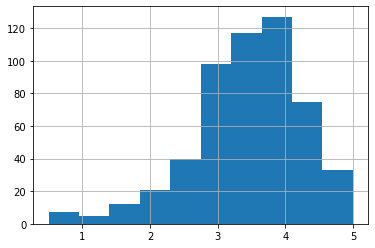

In [40]:
horror_rating.avg_rating.hist()

## 장르의 상관관계

흔히 말하는 로코 (로맨스 & 코미디)는 서로 관계가 있을 것 같고,<br>
혹은 액션/범죄/스릴러들은 서로 관계가 있을 것 같다.<br>
이에 대한 상관관계를 확인하자.

<AxesSubplot:>

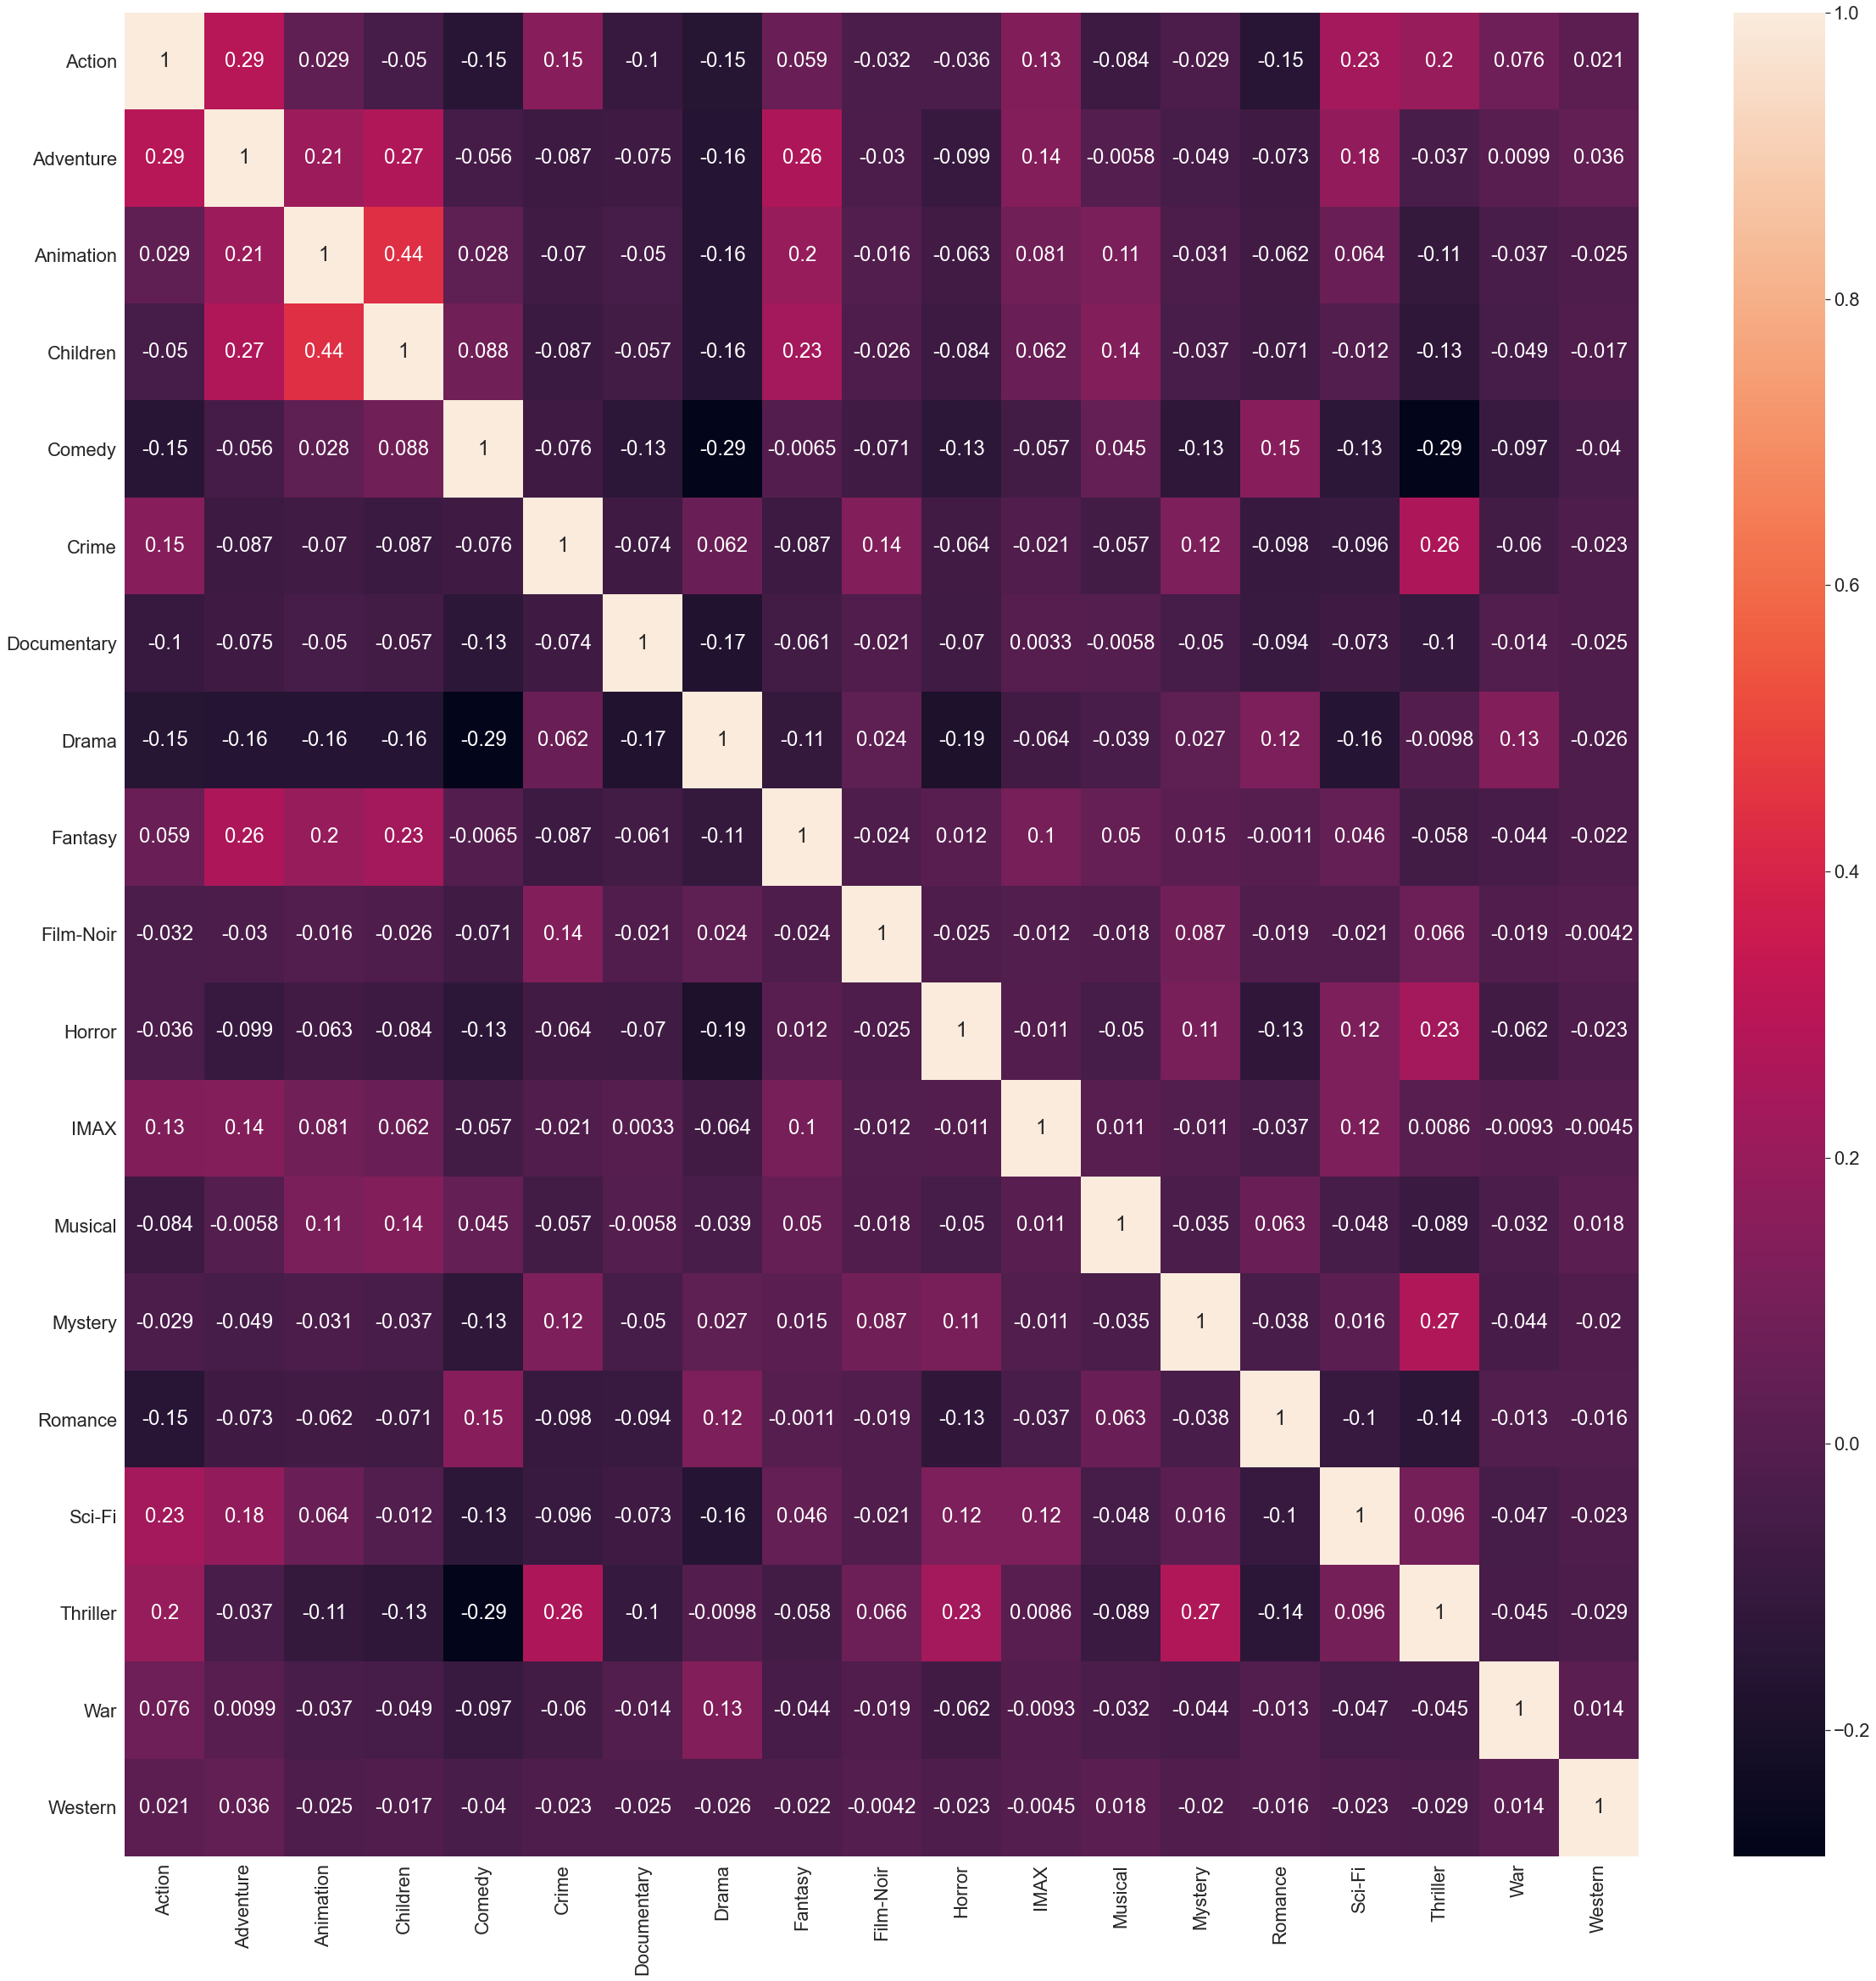

In [41]:
plt.figure(figsize = (40,40))
import seaborn as sns 
sns.set(font_scale = 2)  
sns.heatmap(genres.corr(), annot = True)